<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных-из-файла" data-toc-modified-id="Обзор-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются" data-toc-modified-id="Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются</a></span></li><li><span><a href="#Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов" data-toc-modified-id="Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Неообходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

**Цель**:
1. Проверить гипотезы:
    * средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
    

2. Проанализировать поведение клиентов и определить какой тариф лучше.

Описание тарифов

Тариф «Смарт»
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

Исследование пройдёт в пять этапов:

1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Проверка гипотез.
5. Формулировка выводов.   

## Обзор данных из файла

In [2]:
# импорт библиотеки pandas
import pandas as pd

#имопрт библиотеки matplotlib
import matplotlib.pyplot as plt

#имопрт библиотеки seaborn
# !pip install seaborn==0.11.2
import seaborn as sns

#имопрт библиотеки math
import math

#имопрт библиотеки stats
import scipy.stats as stats

#имопрт библиотеки numpy
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# чтение файла с данными и сохранение в calls
calls = pd.read_csv('/datasets/calls.csv')

In [4]:
# получение первых 10 строк
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [5]:
# получение общей информации о данных
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица `calls` содержит информацию о звонках. В таблице 4 столбца и 202607 строк. Тип данных `float64`, `int64`, `object`.

Согласно документации к данным:
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

Пропущенных данных нет. Дата звонка не в формате `datetime`.

In [6]:
# чтение файла с данными и сохранение в internet
internet = pd.read_csv('/datasets/internet.csv')

In [7]:
# получение первых 10 строк
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [8]:
# получение последних 10 строк
internet.tail(10)

,Unnamed: 0,id,mb_used,session_date,user_id
149386,149386,1499_147,0.00,2018-10-21,1499
149387,149387,1499_148,268.19,2018-11-13,1499
149388,149388,1499_149,778.68,2018-11-24,1499
149389,149389,1499_150,273.98,2018-11-20,1499
149390,149390,1499_151,752.72,2018-10-11,1499
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [9]:
# получение общей информации о данных
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица `internet` содержит информацию об интернет-сессиях. В таблице 5 столбцов и 159396 строк. Тип данных `float64`, `int64`, `object`.

Согласно документации к данным:
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

Пропущенных данных нет. Дата интернет-сессии не в формате `datetime`. Имеется столбец без названия, который дублирует индексы и которого нет в документации. 

In [10]:
# чтение файла с данными и сохранение в message
message = pd.read_csv('/datasets/messages.csv')

In [11]:
# получение первых 10 строк
message.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [12]:
# получение общей информации о данных
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица `message` содержит информацию о сообщениях. В таблице 3 столбца и 123036 строк. Тип данных `int64`, `object`.

Согласно документации к данным:
* `id` — уникальный номер звонка
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

Пропущенных данных нет. Дата сообщения не в формате `datetime`.

In [13]:
# чтение файла с данными и сохранение в tariffs
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [14]:
# получение первых 5 строк
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
# получение общей информации о данных
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица `tariffs` содержит информацию о тарифах. В таблице 8 столбцов и 2 строки. Тип данных `int64`, `object`.

Согласно документации к данным:
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Пропущенных данных нет.

In [16]:
# чтение файла с данными и сохранение в users
users = pd.read_csv('/datasets/users.csv')

In [17]:
# получение первых 10 строк
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [18]:
# получение общей информации о данных
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица `users` содержит информацию о пользователях. В таблице 8 столбцов и 500 строк. Тип данных `int64`, `object`.

Согласно документации к данным:
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

Данные пропущены в столбце `churn_date`, но согласно документации если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Даты не в формате `datetime`.

### Вывод

Имеются 5 таблиц с данными о пользователях, их звонках, сообщениях и интернет-сессиях, а также данные о тарифах, которые используют данные пользователи.

Имеются следующие пробелмы с даннными:
* даты не в формате `datetime`,
* имеется столбец, неописанный в документации и дублирующий индексы,
* данные содержатся в нескольких таблицах.

Необходимо данные проблемы устранить.

## Предобработка данных

In [19]:
# изменение формата даты в столбце `call_date` таблицы `calls` на datetime64
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [20]:
# проверка изменения формата даты
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [21]:
# добавление столбца `month` с месяцем звонка в таблицу `calls`
calls['month'] = calls['call_date'].dt.to_period('M')
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,2018-07
1,1000_1,2018-08-17,0.00,1000,2018-08
2,1000_2,2018-06-11,2.85,1000,2018-06
3,1000_3,2018-09-21,13.80,1000,2018-09
4,1000_4,2018-12-15,5.18,1000,2018-12


In [22]:
# изменение формата даты в столбце `session_date` таблицы `internet` на datetime64
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [23]:
# проверка изменения формата даты
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [24]:
# удаление дублирующего столбца
internet = internet.drop('Unnamed: 0', axis=1)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [25]:
# добавление столбца `month` с месяцем звонка в таблицу `internet`
internet['month'] = internet['session_date'].dt.to_period('M')
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,2018-11
1,1000_1,1052.81,2018-09-07,1000,2018-09
2,1000_2,1197.26,2018-06-25,1000,2018-06
3,1000_3,550.27,2018-08-22,1000,2018-08
4,1000_4,302.56,2018-09-24,1000,2018-09


In [26]:
# изменение формата даты в столбце `session_date` таблицы `message` на datetime64
message['message_date'] = pd.to_datetime(message['message_date'], format='%Y-%m-%d')

In [27]:
# проверка изменения формата даты
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [28]:
# добавление столбца `month` с месяцем звонка в таблицу `message`
message['month'] = message['message_date'].dt.to_period('M')
message.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06
1,1000_1,2018-10-08,1000,2018-10
2,1000_2,2018-08-04,1000,2018-08
3,1000_3,2018-06-16,1000,2018-06
4,1000_4,2018-12-05,1000,2018-12


In [29]:
# определение количества сделанных звонков и израсходованных минут разговора по месяцам
# группировка данных по столбцу `month` `user_id`
calls = calls.groupby(['user_id', 'month']).agg({'duration': 'sum', 'id': 'count'}).rename(columns = {'id': 'calls'}).reset_index()
calls

,user_id,month,duration,calls
0,1000,2018-05,150.06,22
1,1000,2018-06,158.90,43
2,1000,2018-07,318.80,47
3,1000,2018-08,389.87,52
4,1000,2018-09,440.14,58
...,...,...,...,...
3169,1498,2018-10,232.63,41
3170,1499,2018-09,64.65,9
3171,1499,2018-10,429.91,68
3172,1499,2018-11,576.50,74


In [30]:
# определение количества отправленных сообщений по месяцам
# группировка данных по столбцу `month` `user_id`
message = message.groupby(['user_id', 'month']).agg({'id': 'count'}).rename(columns = {'id': 'message'}).reset_index()
message

,user_id,month,message
0,1000,2018-05,22
1,1000,2018-06,60
2,1000,2018-07,75
3,1000,2018-08,81
4,1000,2018-09,57
...,...,...,...
2712,1498,2018-10,42
2713,1499,2018-09,11
2714,1499,2018-10,48
2715,1499,2018-11,59


In [31]:
# определение объемa израсходованного интернет-трафика по месяцам
# группировка данных по столбцу `month` `user_id`
internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
internet

,user_id,month,mb_used
0,1000,2018-05,2253.49
1,1000,2018-06,23233.77
2,1000,2018-07,14003.64
3,1000,2018-08,14055.93
4,1000,2018-09,14568.91
...,...,...,...
3198,1498,2018-10,20579.36
3199,1499,2018-09,1845.75
3200,1499,2018-10,17788.51
3201,1499,2018-11,17963.31


In [32]:
# склеиваем таблицы по звонкам, интернет-сессиям и сообщениям в одну таблицу `report`
report = calls.merge(internet, on =['user_id', 'month'], how = 'outer')\
    .merge(message, on = ['user_id', 'month'], how = 'outer').fillna(0)
report

,user_id,month,duration,calls,mb_used,message
0,1000,2018-05,150.06,22.0,2253.49,22.0
1,1000,2018-06,158.90,43.0,23233.77,60.0
2,1000,2018-07,318.80,47.0,14003.64,75.0
3,1000,2018-08,389.87,52.0,14055.93,81.0
4,1000,2018-09,440.14,58.0,14568.91,57.0
...,...,...,...,...,...,...
3209,1489,2018-08,0.00,0.0,11050.56,17.0
3210,1489,2018-09,0.00,0.0,17206.30,32.0
3211,1489,2018-10,0.00,0.0,19559.44,21.0
3212,1489,2018-11,0.00,0.0,17491.56,20.0


In [33]:
report = report.merge(users, on = 'user_id', how = 'left').merge(tariffs, left_on='tariff', right_on = 'tariff_name', how = 'left')
report

,user_id,month,duration,calls,mb_used,message,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,2018-05,150.06,22.0,2253.49,22.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,2018-06,158.90,43.0,23233.77,60.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,2018-07,318.80,47.0,14003.64,75.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,2018-08,389.87,52.0,14055.93,81.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,2018-09,440.14,58.0,14568.91,57.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,2018-08,0.00,0.0,11050.56,17.0,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3210,1489,2018-09,0.00,0.0,17206.30,32.0,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3211,1489,2018-10,0.00,0.0,19559.44,21.0,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3212,1489,2018-11,0.00,0.0,17491.56,20.0,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart


In [34]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                3214 non-null   int64    
 1   month                  3214 non-null   period[M]
 2   duration               3214 non-null   float64  
 3   calls                  3214 non-null   float64  
 4   mb_used                3214 non-null   float64  
 5   message                3214 non-null   float64  
 6   age                    3214 non-null   int64    
 7   churn_date             187 non-null    object   
 8   city                   3214 non-null   object   
 9   first_name             3214 non-null   object   
 10  last_name              3214 non-null   object   
 11  reg_date               3214 non-null   object   
 12  tariff                 3214 non-null   object   
 13  messages_included      3214 non-null   int64    
 14  mb_per_month_included  3

In [35]:
report.shape

(3214, 21)

In [36]:
report.user_id.nunique()

498

In [37]:
# функция для определения помесячной выручки с каждого пользователя
def proceeds_month(row):
    #определение минут свыше тарифа
    if row['duration'] > row['minutes_included']:
        duration_over = row['duration'] - row['minutes_included']
        duration_over = math.ceil(duration_over)
    else: duration_over = 0
    
    #определение количества сообщений свыше тарифа
    if row['message'] > row['messages_included']:
        message_over = row['message'] - row['messages_included']
    else: message_over = 0
        
    #определение ГБ свыше тарифа
    if row['mb_used'] > row['mb_per_month_included']:
        mb_over = row['mb_used'] - row['mb_per_month_included']
        mb_over = mb_over / 1024
        mb_over = math.ceil(mb_over)
    else: mb_over = 0
        
    proceeds_month = row['rub_monthly_fee'] + duration_over * row['rub_per_minute'] + message_over * row['rub_per_message'] + mb_over * row['rub_per_gb'] 
    
    return proceeds_month

In [38]:
# определение помесячной выручки с каждого пользователя
report['proceeds_month'] = report.apply(proceeds_month, axis=1)
report.head()

,user_id,month,duration,calls,mb_used,message,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,proceeds_month
0,1000,2018-05,150.06,22.0,2253.49,22.0,52,NaN,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,2018-06,158.90,43.0,23233.77,60.0,52,NaN,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,2018-07,318.80,47.0,14003.64,75.0,52,NaN,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,2018-08,389.87,52.0,14055.93,81.0,52,NaN,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,2018-09,440.14,58.0,14568.91,57.0,52,NaN,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0


In [39]:
report['proceeds_month'].describe()

count    3214.000000
mean     1506.616366
std       792.801111
min       550.000000
25%       742.000000
50%      1565.500000
75%      1950.000000
max      6614.000000
Name: proceeds_month, dtype: float64

In [40]:
# функция для определения принадлежности пользователя к Москве или к другому региону
def location(loc):
    if loc == 'Москва':
        return 'Москва'
    else: return 'Другое'

In [41]:
# определение принадлежность пользователя к Москве или к другому региону
report['location'] = report['city'].apply(location)
report.loc[:,['city', 'location']].head(10)

,city,location
0,Краснодар,Другое
1,Краснодар,Другое
2,Краснодар,Другое
3,Краснодар,Другое
4,Краснодар,Другое
5,Краснодар,Другое
6,Краснодар,Другое
7,Краснодар,Другое
8,Москва,Москва
9,Москва,Москва


In [42]:
# подсчёт явных дубликатов
report.duplicated().sum()

0

### Вывод

В рамках предобработки данных выполнили следующие шаги:
* изменен тип данных в столбцах, содержащих дату, на `datetime64`,
* добавлены новые столбцы с расчетами количества сделанных звонков и израсходованных минут разговора по месяцам, количества отправленных сообщений по месяцам и объема израсходованного интернет-трафика по месяцам,
* все имеищиеся таблицы были объединены в одну `report` для дальнейшего анализа,
* проведена проверка на дубликаты, дубликаты отсутствуют.

## Исследовательский анализ данных

In [43]:
#данные по тарифу "Ультра"
report_ultra = report[report['tariff'] == 'ultra']
report_ultra

,user_id,month,duration,calls,mb_used,message,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,proceeds_month,location
0,1000,2018-05,150.06,22.0,2253.49,22.0,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,1950.0,Другое
1,1000,2018-06,158.90,43.0,23233.77,60.0,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,1950.0,Другое
2,1000,2018-07,318.80,47.0,14003.64,75.0,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,1950.0,Другое
3,1000,2018-08,389.87,52.0,14055.93,81.0,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,1950.0,Другое
4,1000,2018-09,440.14,58.0,14568.91,57.0,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,1950.0,Другое
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,1473,2018-09,0.00,0.0,17289.85,19.0,18,NaN,Красноярск,Николай,...,1000,30720,3000,1950,150,1,1,ultra,1950.0,Другое
3205,1473,2018-10,0.00,0.0,13688.65,20.0,18,NaN,Красноярск,Николай,...,1000,30720,3000,1950,150,1,1,ultra,1950.0,Другое
3206,1473,2018-11,0.00,0.0,21673.80,14.0,18,NaN,Красноярск,Николай,...,1000,30720,3000,1950,150,1,1,ultra,1950.0,Другое
3207,1473,2018-12,0.00,0.0,18418.26,20.0,18,NaN,Красноярск,Николай,...,1000,30720,3000,1950,150,1,1,ultra,1950.0,Другое


In [44]:
#данные по тарифу "Смарт"
report_smart = report[report['tariff'] == 'smart']
report_smart

,user_id,month,duration,calls,mb_used,message,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,proceeds_month,location
8,1001,2018-11,408.12,59.0,18429.34,0.0,41,NaN,Москва,Иван,...,50,15360,500,550,200,3,3,smart,1150.0,Москва
9,1001,2018-12,391.34,63.0,14036.66,0.0,41,NaN,Москва,Иван,...,50,15360,500,550,200,3,3,smart,550.0,Москва
10,1002,2018-06,110.37,15.0,10856.82,4.0,59,NaN,Стерлитамак,Евгений,...,50,15360,500,550,200,3,3,smart,550.0,Другое
11,1002,2018-07,204.75,26.0,17580.10,11.0,59,NaN,Стерлитамак,Евгений,...,50,15360,500,550,200,3,3,smart,1150.0,Другое
12,1002,2018-08,269.71,42.0,20319.26,13.0,59,NaN,Стерлитамак,Евгений,...,50,15360,500,550,200,3,3,smart,1550.0,Другое
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,2018-08,0.00,0.0,11050.56,17.0,35,NaN,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,smart,550.0,Другое
3210,1489,2018-09,0.00,0.0,17206.30,32.0,35,NaN,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,smart,950.0,Другое
3211,1489,2018-10,0.00,0.0,19559.44,21.0,35,NaN,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,smart,1550.0,Другое
3212,1489,2018-11,0.00,0.0,17491.56,20.0,35,NaN,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,smart,1150.0,Другое


In [45]:
#соотношение пользователей разных тарифов
users.groupby('tariff').agg({'user_id': 'count'})

,user_id
tariff,
smart,351
ultra,149


In [46]:
#определение среднего количества, дисперсии и стандартного отклонения для звонков, интернет-трафика, сообщений и месячной выручки
params = ['duration', 'mb_used', 'message', 'proceeds_month']

print('Тариф "Ультра"')
for param in params:
    mean = np.mean(report_ultra[param])
    var = np.var(report_ultra[param], ddof=1)
    std = np.std(report_ultra[param])
    print(param, 'среднее:', mean, 'дисперсия:', var, 'стд.отклонение:', std)
    
print()
print('Тариф "Смарт"')
for param in params:
    mean = np.mean(report_smart[param])
    var = np.var(report_smart[param], ddof=1)
    std = np.std(report_smart[param])
    print(param, 'среднее:', mean, 'дисперсия:', var, 'стд.отклонение:', std)

Тариф "Ультра"
duration среднее: 497.06822335025385 дисперсия: 89942.50036950292 стд.отклонение: 299.7518777028539
mb_used среднее: 19468.805208121827 дисперсия: 101751013.78335385 стд.отклонение: 10082.049060669482
message среднее: 49.36345177664975 дисперсия: 2285.2661425446736 стд.отклонение: 47.78018496610161
proceeds_month среднее: 2070.1522842639592 дисперсия: 141516.7450786183 стд.отклонение: 375.9961080333192

Тариф "Смарт"
duration среднее: 394.42702557200545 дисперсия: 32386.395978716133 стд.отклонение: 179.92183418277207
mb_used среднее: 16208.386989681472 дисперсия: 34462496.46274242 стд.отклонение: 5869.159692433401
message среднее: 33.384028712427096 дисперсия: 796.8129584480083 стд.отклонение: 28.221542886898938
proceeds_month среднее: 1257.5886047554957 дисперсия: 641465.797015512 стд.отклонение: 800.7359209761796


In [48]:
pivot_report = report.pivot_table(index = ['tariff'], values = ['duration', 'mb_used', 'message', 'proceeds_month'], aggfunc = [np.mean, np.var, np.std])
pivot_report

mean                                                var  \
         duration      mb_used   message proceeds_month     duration   
tariff                                                                 
smart  394.427026 16208.386990 33.384029    1257.588605 32386.395979   
ultra  497.068223 19468.805208 49.363452    2070.152284 89942.500370   

                                                          std               \
                mb_used     message proceeds_month   duration      mb_used   
tariff                                                                       
smart   34462496.462742  796.812958  641465.797016 179.962207  5870.476681   
ultra  101751013.783354 2285.266143  141516.745079 299.904152 10087.170752   

                                 
         message proceeds_month  
tariff                           
smart  28.227876     800.915599  
ultra  47.804457     376.187114

In [49]:
pivot_report.T

tariff                        smart            ultra
mean duration            394.427026       497.068223
     mb_used           16208.386990     19468.805208
     message              33.384029        49.363452
     proceeds_month     1257.588605      2070.152284
var  duration          32386.395979     89942.500370
     mb_used        34462496.462742 101751013.783354
     message             796.812958      2285.266143
     proceeds_month   641465.797016    141516.745079
std  duration            179.962207       299.904152
     mb_used            5870.476681     10087.170752
     message              28.227876        47.804457
     proceeds_month      800.915599       376.187114

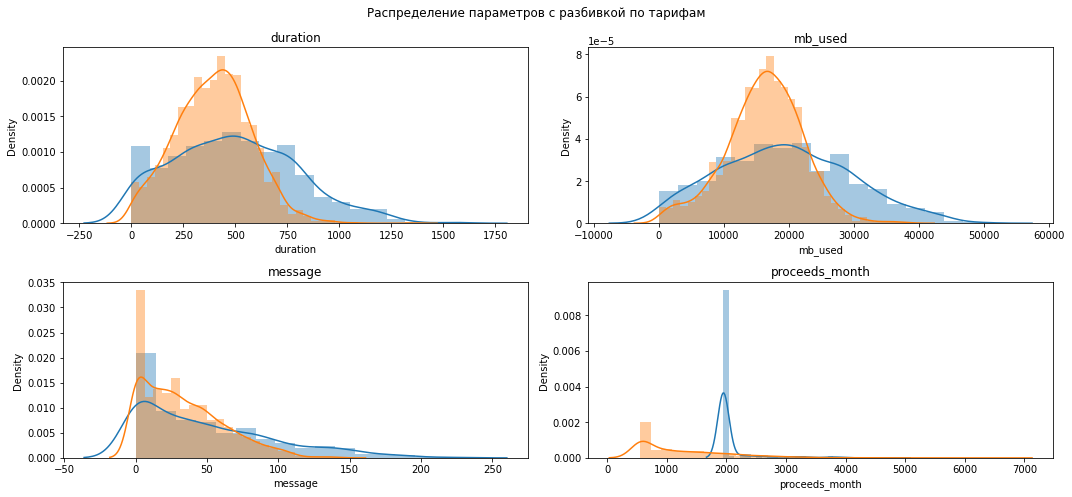

In [48]:
# построение распределений звонков, сообщений, интернет-трафика и выручки по тарифам
col_count, row_count = 2, 2

plt.figure(figsize = (15, 7))

for i, param in enumerate(params):
    for tariff in report['tariff'].unique():
        current = report.query('tariff == @tariff')
        sns.distplot(current[param], ax = plt.subplot(row_count, col_count, i + 1))
    plt.title(param)
    
plt.suptitle('Распределение параметров с разбивкой по тарифам')
plt.tight_layout()

Распределения продолжительности звонков и использованного интернет-трафика похожи на нормальное распределение. Распределение количества отрпавленных сообщений имеет пик в 0 с хвостом вправо. Можно предположить, что сообщения не пользуются популярностью у пользователей, в среднем не расходуется и количество сообщений, включенных в тариф. Распределение выручки с пользователей сосредаточено в районе абонентской платы  по тарифам. Большинство пользозвателей тарифа Ультра не выходят за рамки абонентской платы, а пользователи тарифа Смарт наоборот.

### Вывод

На данном шаге проанализировали основные параметры тарифов Ультра и Смарт для каждого пользователя, такие как:
* количество сделанных звонков и израсходованных минут разговора по месяцам,
* объем израсходованного интернет-трафика по месяцам,
* количество отправленных сообщений по месяцам,
* помесячная выручка с каждого пользователя.

Пользователи тарифа Ультра в среднем в месяц разговоривают по 497 мин, отправлют по 49 сообщения и расходуют 19468 МБ интернет-трафика. Это показывает, что пользователи тарифа Ультра в среднем не платят сверх абонентской платы. Средняя помесячная выручка с каждого пользователя составляет 2070р.

Пользователи тарифа Смарт в среднем в месяц разговоривают по 394 мин, отправлют по 33 сообщения и расходуют 16208 МБ интернет-трафика. Это показывает, что пользователи тарифа Смарт в среднем платят за услуги интернета сверх тарифного пакета. Средняя помесячная выручка с каждого пользователя составляет 1257р.

Сообщения у пользователей обоих тарифов не пользуются популярностью, в среднем не расходуется и количество сообщений, включенных в тариф.

## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние выручки пользователей тарифов «Ультра» и «Смарт» равны}\\
   H_1 :\text{Средние выручки пользователей тарифов «Ультра» и «Смарт» не равны}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

In [49]:
alpha = 0.05

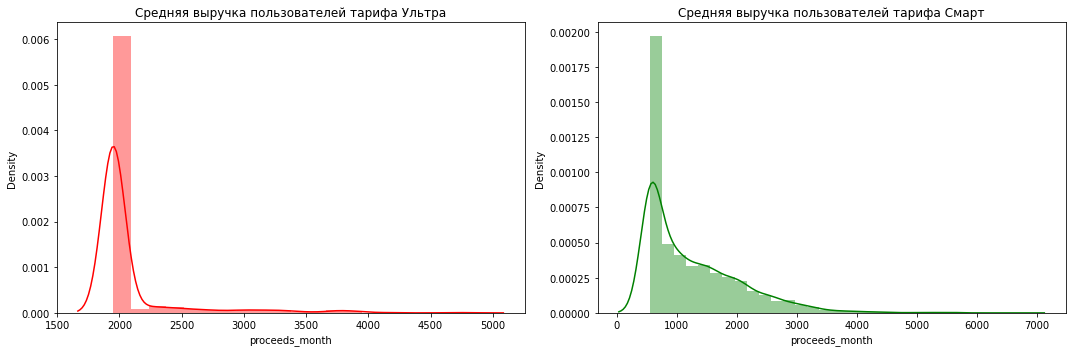

In [50]:
#построение распределений средней выручки пользователей тарифов «Ультра» и «Смарт» 
figure1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1[0].set_title('Средняя выручка пользователей тарифа Ультра')
sns.distplot(report_ultra['proceeds_month'], bins=20, color='red', ax=ax1[0])

ax1[1].set_title('Средняя выручка пользователей тарифа Смарт')
sns.distplot(report_smart['proceeds_month'], bins=30, color='green', ax=ax1[1])


figure1.tight_layout()

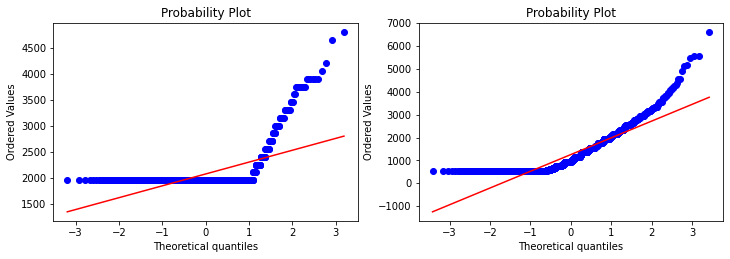

In [51]:
# построение qq-plot для проверки распределений средней выручки пользователей тарифов «Ультра» и «Смарт» на нормальность
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
stats.probplot(report_ultra['proceeds_month'], dist="norm", plot=plt)
plt.subplot(2,2,2)
stats.probplot(report_smart['proceeds_month'], dist="norm", plot=plt)
plt.show()

Как видно по рисункам распределения средней выручки пользователей тарифов «Ультра» и «Смарт» не нормальное. Поэтому для проверки гипоетезы посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух независимых выборок.

ttest применим, если выполняются следующие условия:
* Генеральные совокупности не должны зависеть друг от друга - наши выборки независимы,
* Выборочные средние должны быть нормально распределены - благодаря ЦПТ, распределение средних у нас нормальное (ниже приведены распределения),
* Дисперсии рассматриваемых генеральных совокупностей должны быть равны - выборки у нас разного размера, но можно указать параметр `equal_var = False`.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу. 

In [52]:
results = stats.ttest_ind(report_ultra['proceeds_month'], report_smart['proceeds_month'], equal_var=False)


print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  6.179723168444486e-274
Отвергаем нулевую гипотезу


In [53]:
#формироване списка средних для тарифов Ультра и Смарт для построения распределений
means_ultra = []
means_smart = []

for _ in range(10000):
    tmp_sample_ultra = np.random.choice(report_ultra['proceeds_month'], size=len(report_ultra['proceeds_month']), replace=True)
    tmp_sample_smart = np.random.choice(report_smart['proceeds_month'], size=len(report_smart['proceeds_month']), replace=True)
    means_ultra.append(np.mean(tmp_sample_ultra))
    means_smart.append(np.mean(tmp_sample_smart))

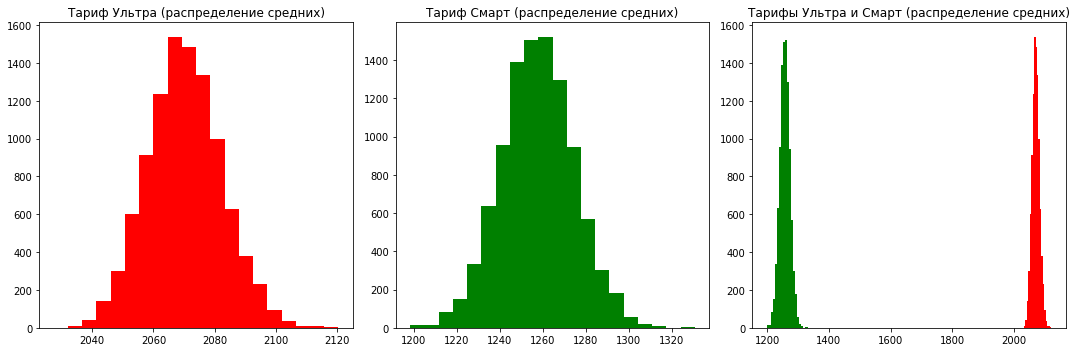

In [54]:
# построение распределений средних тарифов Ультра и Смарт
figure2, ax2 = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax2[0].set_title('Тариф Ультра (распределение средних)')
ax2[0].hist(means_ultra, bins=20, color='red')

ax2[1].set_title('Тариф Смарт (распределение средних)')
ax2[1].hist(means_smart, bins=20, color='green')

ax2[2].set_title('Тарифы Ультра и Смарт (распределение средних)')
ax2[2].hist(means_ultra, bins=20, color='red')
ax2[2].hist(means_smart, bins=20, color='green')

figure2.tight_layout()

На рисунках наглядно видно, что средние выручки пользователей тарифов Ультра и Смарт отличаются, что также показал ttest. Средняя выручка тарифа Ультра почти в 2 раза больше выручки тарифа Смарт.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [55]:
# срез данных, где город пользователей Москва
report_msk = report[report['location'] == 'Москва']
report_msk

,user_id,month,duration,calls,mb_used,message,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,proceeds_month,location
8,1001,2018-11,408.120000,59.000000,18429.340000,0.000000,41,NaN,Москва,Иван,...,50,15360,500,550,200,3,3,smart,1150.000000,Москва
9,1001,2018-12,391.340000,63.000000,14036.660000,0.000000,41,NaN,Москва,Иван,...,50,15360,500,550,200,3,3,smart,550.000000,Москва
17,1003,2018-08,355.670000,55.000000,8565.210000,37.000000,23,NaN,Москва,Белла,...,1000,30720,3000,1950,150,1,1,ultra,1950.000000,Москва
18,1003,2018-09,904.890000,134.000000,12468.870000,91.000000,23,NaN,Москва,Белла,...,1000,30720,3000,1950,150,1,1,ultra,1950.000000,Москва
19,1003,2018-10,809.070000,108.000000,14768.140000,83.000000,23,NaN,Москва,Белла,...,1000,30720,3000,1950,150,1,1,ultra,1950.000000,Москва
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,1490,2018-09,305.990000,44.000000,14816.950000,48.000000,30,NaN,Москва,Радомир,...,50,15360,500,550,200,3,3,smart,550.000000,Москва
3120,1490,2018-10,290.900000,42.000000,20664.970000,45.000000,30,NaN,Москва,Радомир,...,50,15360,500,550,200,3,3,smart,1750.000000,Москва
3121,1490,2018-11,265.970000,38.000000,18712.660000,47.000000,30,NaN,Москва,Радомир,...,50,15360,500,550,200,3,3,smart,1350.000000,Москва
3122,1490,2018-12,271.630000,42.000000,15785.740000,46.000000,30,NaN,Москва,Радомир,...,50,15360,500,550,200,3,3,smart,750.000000,Москва


In [56]:
# срез данных, где пользователей из другого региона
report_other = report[report['location'] == 'Другое']
report_other

,user_id,month,duration,calls,mb_used,message,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,proceeds_month,location
0,1000,2018-05,150.060000,22.000000,2253.490000,22.000000,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,1950.000000,Другое
1,1000,2018-06,158.900000,43.000000,23233.770000,60.000000,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,1950.000000,Другое
2,1000,2018-07,318.800000,47.000000,14003.640000,75.000000,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,1950.000000,Другое
3,1000,2018-08,389.870000,52.000000,14055.930000,81.000000,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,1950.000000,Другое
4,1000,2018-09,440.140000,58.000000,14568.910000,57.000000,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,1950.000000,Другое
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,2018-08,0.000000,0.000000,11050.560000,17.000000,35,NaN,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,smart,550.000000,Другое
3210,1489,2018-09,0.000000,0.000000,17206.300000,32.000000,35,NaN,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,smart,950.000000,Другое
3211,1489,2018-10,0.000000,0.000000,19559.440000,21.000000,35,NaN,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,smart,1550.000000,Другое
3212,1489,2018-11,0.000000,0.000000,17491.560000,20.000000,35,NaN,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,smart,1150.000000,Другое


<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние выручки пользователей из Москвы равна выручке пользователей из других регионов}\\
   H_1 :\text{Средние выручки пользователей из Москвы отличается от выручки пользователей из других регионов}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

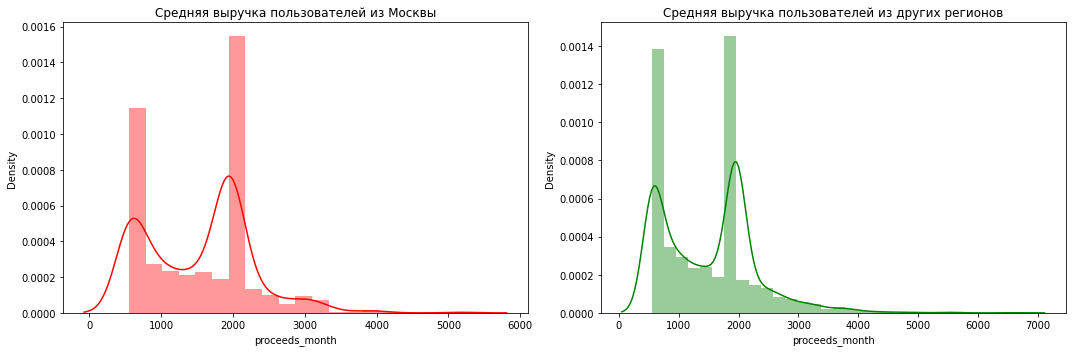

In [57]:
#построение распределений средней выручки пользователей из Москвы и из других регионов
figure3, ax3 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax3[0].set_title('Средняя выручка пользователей из Москвы')
sns.distplot(report_msk['proceeds_month'], bins=20, color='red', ax=ax3[0])

ax3[1].set_title('Средняя выручка пользователей из других регионов')
sns.distplot(report_other['proceeds_month'], bins=30, color='green', ax=ax3[1])


figure3.tight_layout()

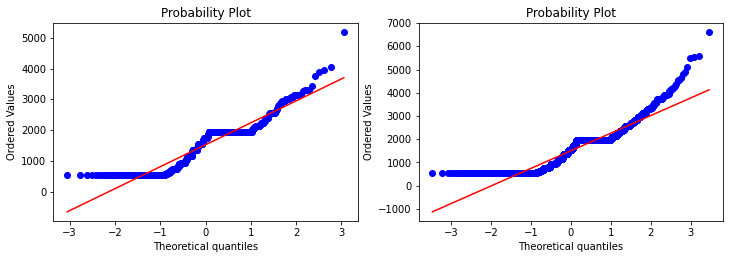

In [58]:
# построение qq-plot для проверки распределений средней выручки пользователей из Москвы и из других регионов на нормальность
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
stats.probplot(report_msk['proceeds_month'], dist="norm", plot=plt)
plt.subplot(2,2,2)
stats.probplot(report_other['proceeds_month'], dist="norm", plot=plt)
plt.show()

Как видно по рисункам распределения средней выручки пользователей из Москвы и из других регонов не нормальное. Наблюдаются 2 пика, ккоторые характеризуют максимальную выручку по разным тарифам. Поэтому для проверки гипоетезы посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух независимых выборок.

ttest применим, если выполняются следующие условия:
* Генеральные совокупности не должны зависеть друг от друга - наши выборки независимы,
* Выборочные средние должны быть нормально распределены - благодаря ЦПТ, распределение средних у нас нормальное (ниже приведены распределения),
* Дисперсии рассматриваемых генеральных совокупностей должны быть равны - выборки у нас разного размера, но можно указать параметр `equal_var = False`.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.  

In [59]:
results = stats.ttest_ind(report_msk['proceeds_month'], report_other['proceeds_month'], equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.46532858228722906
Не получилось отвергнуть нулевую гипотезу


In [60]:
#формироване списка средних для выручки пользоателей из Москвы и из других регионов для построения распределений
means_msk = []
means_other = []

for _ in range(10000):
    tmp_sample_msk = np.random.choice(report_msk['proceeds_month'], size=len(report_msk['proceeds_month']), replace=True)
    tmp_sample_other = np.random.choice(report_other['proceeds_month'], size=len(report_other['proceeds_month']), replace=True)
    means_msk.append(np.mean(tmp_sample_msk))
    means_other.append(np.mean(tmp_sample_other))

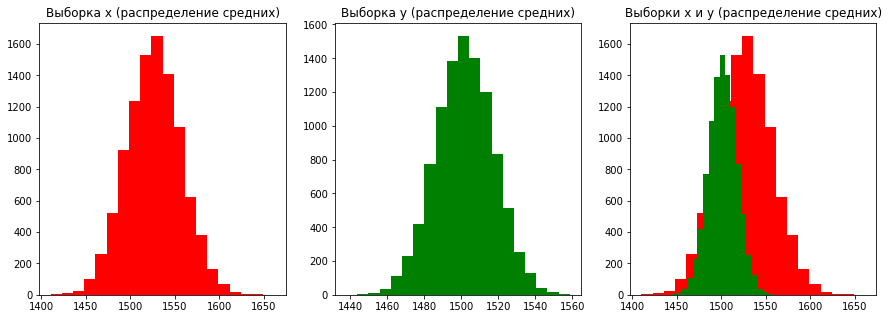

In [61]:
figure4, ax4 = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax4[0].set_title('Выборка x (распределение средних)')
ax4[0].hist(means_msk, bins=20, color='red')

ax4[1].set_title('Выборка y (распределение средних)')
ax4[1].hist(means_other, bins=20, color='green')

ax4[2].set_title('Выборки x и y (распределение средних)')
ax4[2].hist(means_msk, bins=20, color='red')
ax4[2].hist(means_other, bins=20, color='green')

figure3.tight_layout()

На рисунках наглядно видно, что средние выручки пользователей из Москвы и из других регионов практически одинаковы и находятся в районе 1500-1525, что также показал ttest.

### Вывод

В рамках данного шага проверили две гипотезы:
 * средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются -  данные не позволили нам отвергнуть данную гипотезу;
 * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - данную гипотезу отвергнули.
 
Для проверки обеих гипотез посчитали p-value, используя ttest, уровень значимости выбрали $\alpha = 0.05$.

## Общий вывод

В рамках данного проекта проанализировали поведение пользователей двух тарифов: Ультра и Смарт. Несмотря на то, что пользователей тарифа Ультра почти в 2.5 раза меньше чем пользователей тарифа Смарт (30% и 70% соответственно), помесячная выручка с каждого пользователя тарифа Ультра в 2 раза больше выручки тарифа Смарт. При этом неважно из какого города пользователи из Москвы или из другого региона, выручки для них равны.

Таким образом можно сделать вывод, что тариф Ультра лучше.